# EVOLUTION OF KPOP ACCROSS GENERATIONS

Analyze the popularity and characteristics of different kpop artists

Gain insights into the musical characteristics, popularity trends and release patterns of KPOP groups from different generations

Conclusion: what contributes to the success of kpop artists

## IMPORTS

In [1]:
import spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, silhouette_score
from sklearn.linear_model import LinearRegression


## CREDENTIALS

In [2]:
#MY IDs
secret_id = '3355bc26beee4e998623b9b9817e6245'
my_id = 'a44e325b50154f278abc68994957c7ad'

In [3]:
#CREDENTIALS
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id= my_id, client_secret= secret_id)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## TOP 10 SONGS BY ARTISTS FROM SECOND, THIRD AND FOURTH GENERATION IN KPOP RANKED BY POPULARITY

In [50]:
artist_names = ['Girls Generation', 'SHINEE', 'Super Junior', 'Apink', 'BTS', 'SEVENTEEN', 'TWICE', 'EXO', 'NEWJEANS', 'LE SSERAFIM', 'ENHYPEN', 'ATEEZ']

track_results = []
features_df = pd.DataFrame()

for artist_name in artist_names:
    artists = sp.search(q='artist:' + artist_name, type='artist', limit=10)
    artist_uri = artists['artists']['items'][0]['uri']

    results = sp.artist_top_tracks(artist_uri)

    for i, item in enumerate(results['tracks']):
        track_id = item['id']
        track_name = item['name']
        popularity = item['popularity']
        
        artist = sp.artist(artist_uri)
        
        genres = artist['genres']
        
        track_results.append((artist_name, track_name, track_id, item['album']['release_date'], popularity, genres))

        audio_features = sp.audio_features(track_id)
        local_features = pd.DataFrame(audio_features)
        features_df = pd.concat([features_df, local_features], ignore_index=True)

track_df = pd.DataFrame(track_results, columns=('Artist', 'Song Name', 'Id', 'Release Date', 'Popularity', 'Genres'))

final_df = pd.concat([track_df, features_df], axis=1)

# Separate artists into three DataFrames
secondgen = final_df[final_df['Artist'].isin(['Girls Generation', 'SHINEE', 'Super Junior', 'Apink'])]
thirdgen = final_df[final_df['Artist'].isin(['BTS', 'SEVENTEEN', 'TWICE', 'EXO'])]
fourthgen = final_df[final_df['Artist'].isin(['NEWJEANS', 'LE SSERAFIM', 'ENHYPEN', 'ATEEZ'])]

# Sort by popularity
secondgen2 = secondgen.sort_values(by='Popularity', ascending=False)
thirdgen2 = thirdgen.sort_values(by='Popularity', ascending=False)
fourthgen2 = fourthgen.sort_values(by='Popularity', ascending=False)

In [57]:
secondgen2.head()


,Artist,Song Name,Id,Release Date,Popularity,Genres,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
10,SHINEE,HARD,2VV1RIhTgeJ4PEMYz6TqDB,2023-06-26,74,"[k-pop, k-pop boy group]",0.781,0.800,2,-3.002,...,0.0347,0.687,91.969,audio_features,2VV1RIhTgeJ4PEMYz6TqDB,spotify:track:2VV1RIhTgeJ4PEMYz6TqDB,https://api.spotify.com/v1/tracks/2VV1RIhTgeJ4...,https://api.spotify.com/v1/audio-analysis/2VV1...,176720,4
0,Girls Generation,FOREVER 1,1oen3GpTcA486fTHaT7neg,2022-08-05,71,"[k-pop, k-pop girl group]",0.615,0.871,9,-1.248,...,0.2540,0.297,123.915,audio_features,1oen3GpTcA486fTHaT7neg,spotify:track:1oen3GpTcA486fTHaT7neg,https://api.spotify.com/v1/tracks/1oen3GpTcA48...,https://api.spotify.com/v1/audio-analysis/1oen...,202533,4
11,SHINEE,Replay,1rp986nzkyAX1wFpxzbwlC,2008-08-28,70,"[k-pop, k-pop boy group]",0.716,0.779,1,-2.203,...,0.1670,0.590,99.977,audio_features,1rp986nzkyAX1wFpxzbwlC,spotify:track:1rp986nzkyAX1wFpxzbwlC,https://api.spotify.com/v1/tracks/1rp986nzkyAX...,https://api.spotify.com/v1/audio-analysis/1rp9...,213827,4
1,Girls Generation,Gee,0t7kjpVLgOYITrSfFCoBEA,2010-01-28,69,"[k-pop, k-pop girl group]",0.756,0.930,1,-1.082,...,0.1100,0.737,99.988,audio_features,0t7kjpVLgOYITrSfFCoBEA,spotify:track:0t7kjpVLgOYITrSfFCoBEA,https://api.spotify.com/v1/tracks/0t7kjpVLgOYI...,https://api.spotify.com/v1/audio-analysis/0t7k...,201160,4
13,SHINEE,JUICE,2ka8U0A2e93hBFA43mbgfy,2023-06-26,66,"[k-pop, k-pop boy group]",0.629,0.968,10,-2.183,...,0.0449,0.761,170.049,audio_features,2ka8U0A2e93hBFA43mbgfy,spotify:track:2ka8U0A2e93hBFA43mbgfy,https://api.spotify.com/v1/tracks/2ka8U0A2e93h...,https://api.spotify.com/v1/audio-analysis/2ka8...,197520,4


In [58]:
thirdgen2.head()

,Artist,Song Name,Id,Release Date,Popularity,Genres,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
40,BTS,Take Two,5IAESfJjmOYu7cHyX557kz,2023-06-09,95,"[k-pop, k-pop boy group, pop]",0.617,0.589,7,-5.978,...,0.3780,0.566,92.991,audio_features,5IAESfJjmOYu7cHyX557kz,spotify:track:5IAESfJjmOYu7cHyX557kz,https://api.spotify.com/v1/tracks/5IAESfJjmOYu...,https://api.spotify.com/v1/audio-analysis/5IAE...,229953,4
50,SEVENTEEN,Super,3AOf6YEpxQ894FmrwI9k96,2023-04-24,88,"[k-pop, k-pop boy group]",0.771,0.880,8,-4.091,...,0.1670,0.347,137.018,audio_features,3AOf6YEpxQ894FmrwI9k96,spotify:track:3AOf6YEpxQ894FmrwI9k96,https://api.spotify.com/v1/tracks/3AOf6YEpxQ89...,https://api.spotify.com/v1/audio-analysis/3AOf...,200387,4
41,BTS,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo,2022-10-06,88,"[k-pop, k-pop boy group, pop]",0.881,0.592,2,-4.898,...,0.0901,0.719,101.058,audio_features,5Odq8ohlgIbQKMZivbWkEo,spotify:track:5Odq8ohlgIbQKMZivbWkEo,https://api.spotify.com/v1/tracks/5Odq8ohlgIbQ...,https://api.spotify.com/v1/audio-analysis/5Odq...,154487,4
43,BTS,Dreamers [Music from the FIFA World Cup Qatar ...,1RDvyOk4WtPCtoqciJwVn8,2022-11-20,87,"[k-pop, k-pop boy group, pop]",0.710,0.879,0,-4.218,...,0.4390,0.341,114.993,audio_features,1RDvyOk4WtPCtoqciJwVn8,spotify:track:1RDvyOk4WtPCtoqciJwVn8,https://api.spotify.com/v1/tracks/1RDvyOk4WtPC...,https://api.spotify.com/v1/audio-analysis/1RDv...,201391,4
44,BTS,The Planet,4IJsVXbSeGPUrgwpVoHmlg,2023-05-12,86,"[k-pop, k-pop boy group, pop]",0.665,0.848,0,-3.619,...,0.2000,0.687,119.986,audio_features,4IJsVXbSeGPUrgwpVoHmlg,spotify:track:4IJsVXbSeGPUrgwpVoHmlg,https://api.spotify.com/v1/tracks/4IJsVXbSeGPU...,https://api.spotify.com/v1/audio-analysis/4IJs...,178156,4


In [59]:
fourthgen2.head()

,Artist,Song Name,Id,Release Date,Popularity,Genres,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
80,NEWJEANS,OMG,65FftemJ1DbbZ45DUfHJXE,2023-01-02,92,"[k-pop, k-pop girl group]",0.804,0.771,9,-4.067,...,0.1080,0.739,126.956,audio_features,65FftemJ1DbbZ45DUfHJXE,spotify:track:65FftemJ1DbbZ45DUfHJXE,https://api.spotify.com/v1/tracks/65FftemJ1Dbb...,https://api.spotify.com/v1/audio-analysis/65Ff...,212253,4
90,LE SSERAFIM,UNFORGIVEN (feat. Nile Rodgers),51vRumtqbkNW9wrKfESwfu,2023-05-01,89,[k-pop girl group],0.795,0.875,4,-4.079,...,0.1070,0.375,104.008,audio_features,51vRumtqbkNW9wrKfESwfu,spotify:track:51vRumtqbkNW9wrKfESwfu,https://api.spotify.com/v1/tracks/51vRumtqbkNW...,https://api.spotify.com/v1/audio-analysis/51vR...,182149,4
81,NEWJEANS,Ditto,3r8RuvgbX9s7ammBn07D3W,2022-12-19,89,"[k-pop, k-pop girl group]",0.814,0.641,6,-5.957,...,0.0993,0.183,133.854,audio_features,3r8RuvgbX9s7ammBn07D3W,spotify:track:3r8RuvgbX9s7ammBn07D3W,https://api.spotify.com/v1/tracks/3r8RuvgbX9s7...,https://api.spotify.com/v1/audio-analysis/3r8R...,185507,4
100,ENHYPEN,Bite Me,7mpdNiaQvygj2rHoxkzMfa,2023-05-22,89,"[anime, k-pop boy group]",0.795,0.781,1,-4.647,...,0.1080,0.687,104.972,audio_features,7mpdNiaQvygj2rHoxkzMfa,spotify:track:7mpdNiaQvygj2rHoxkzMfa,https://api.spotify.com/v1/tracks/7mpdNiaQvygj...,https://api.spotify.com/v1/audio-analysis/7mpd...,157532,4
82,NEWJEANS,Hype Boy,0a4MMyCrzT0En247IhqZbD,2022-08-01,87,"[k-pop, k-pop girl group]",0.593,0.935,4,-3.430,...,0.2860,0.783,99.976,audio_features,0a4MMyCrzT0En247IhqZbD,spotify:track:0a4MMyCrzT0En247IhqZbD,https://api.spotify.com/v1/tracks/0a4MMyCrzT0E...,https://api.spotify.com/v1/audio-analysis/0a4M...,179027,4


## CLUSTERING

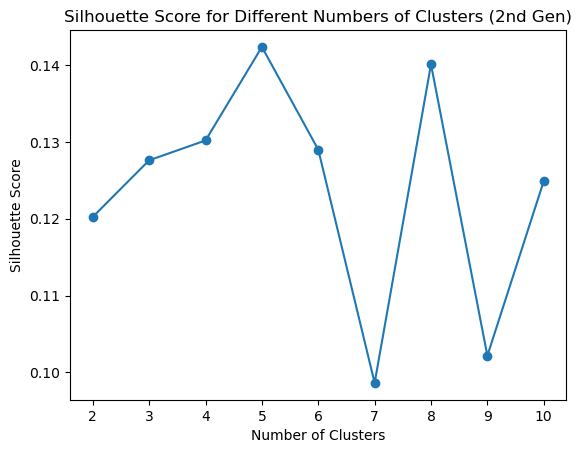

In [8]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
data = secondgen2.loc[:, features].values

#Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-means Clustering
min_clusters = 2
max_clusters = 10
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

#plot
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (2nd Gen)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


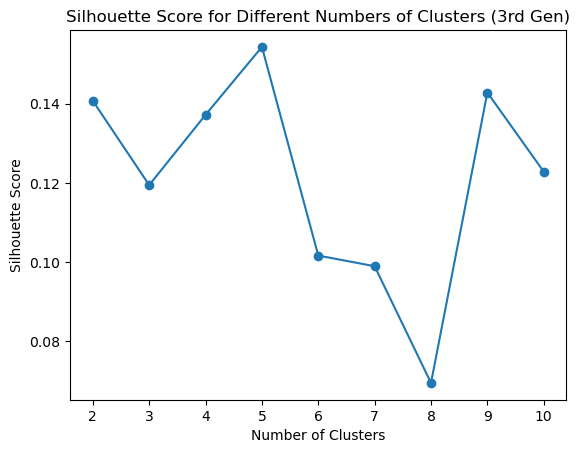

In [9]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
data = thirdgen2.loc[:, features].values

#Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-means Clustering
min_clusters = 2
max_clusters = 10
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

#plot
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (3rd Gen)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


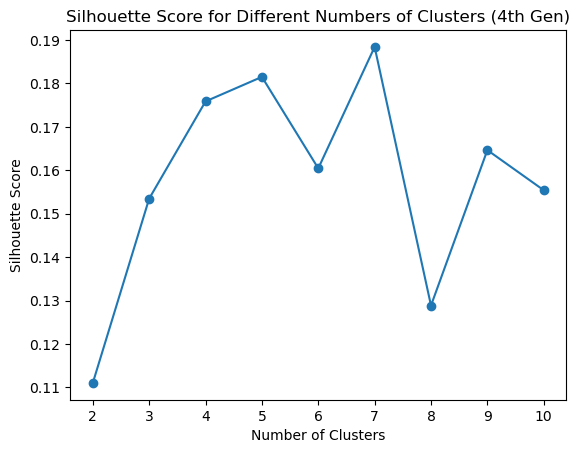

In [10]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
data = fourthgen2.loc[:, features].values

#Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-means Clustering
min_clusters = 2
max_clusters = 10
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

#plot
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (4th Gen)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


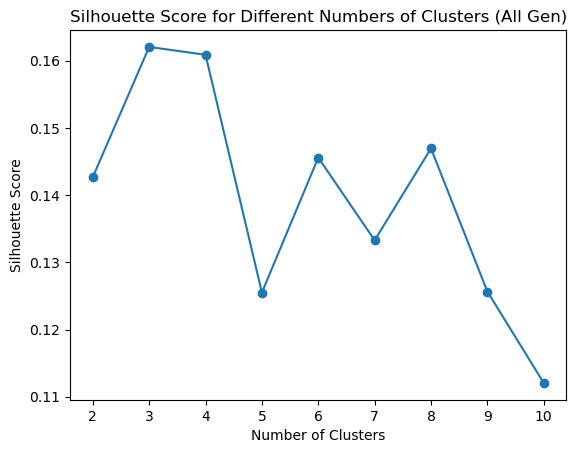

In [11]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness','liveness', 'valence', 'tempo']
data = final_df.loc[:, features].values

#Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-means Clustering
min_clusters = 2
max_clusters = 10
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

#plot
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters (All Gen)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


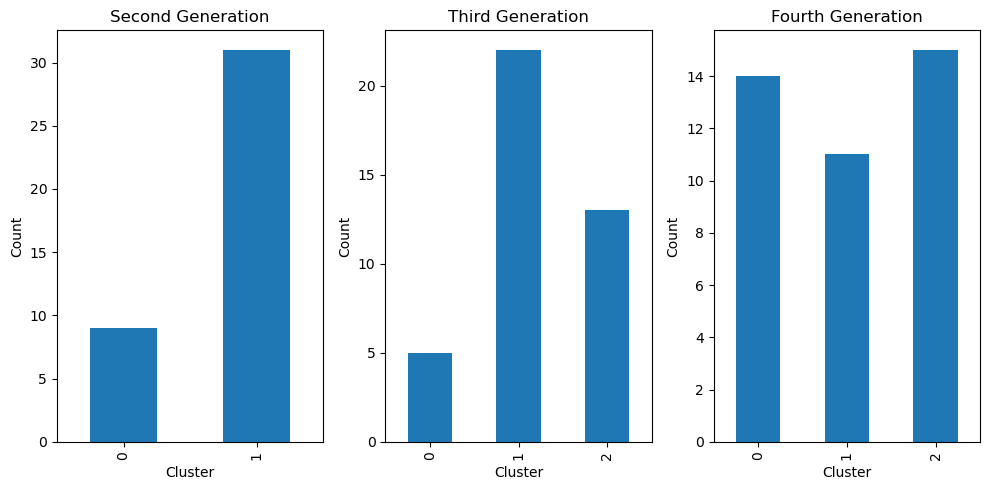

In [64]:
#Clusters 
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
kmeans.fit(scaled_data)
final_df['Cluster'] = kmeans.labels_

# add cluster column
secondgen2 = secondgen2.merge(final_df[['Song Name', 'Cluster']], on='Song Name')
thirdgen2 = thirdgen2.merge(final_df[['Song Name', 'Cluster']], on='Song Name')
fourthgen2 = fourthgen2.merge(final_df[['Song Name', 'Cluster']], on='Song Name')

# Plot 
plt.figure(figsize=(10, 5))

# Second gen artists
plt.subplot(1, 3, 1)
secondgen2['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Second Generation')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Third gen artists
plt.subplot(1, 3, 2)
thirdgen2['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Third Generation')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Fourth gen artists
plt.subplot(1, 3, 3)
fourthgen2['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Fourth Generation')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

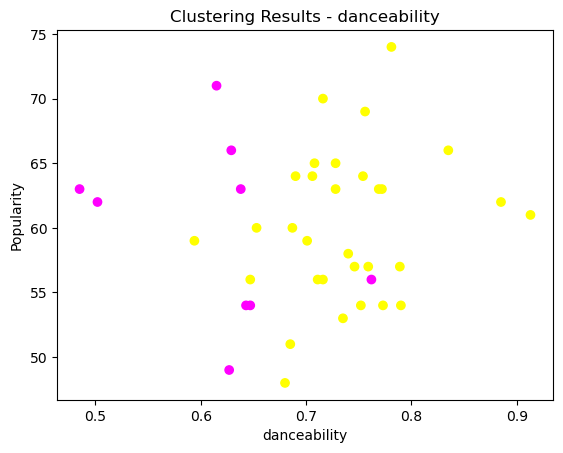

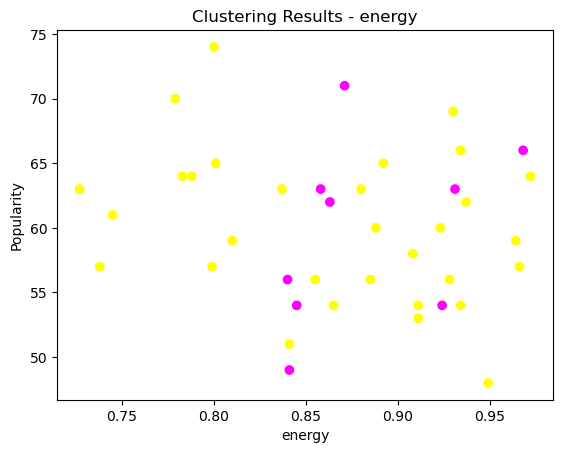

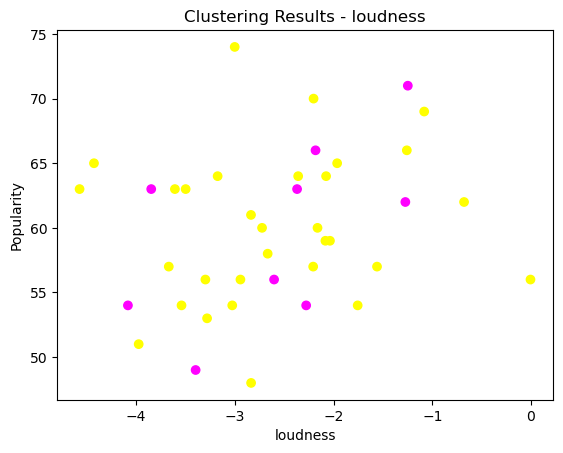

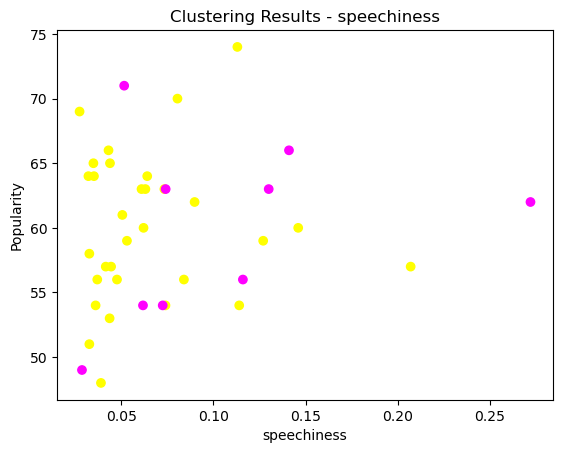

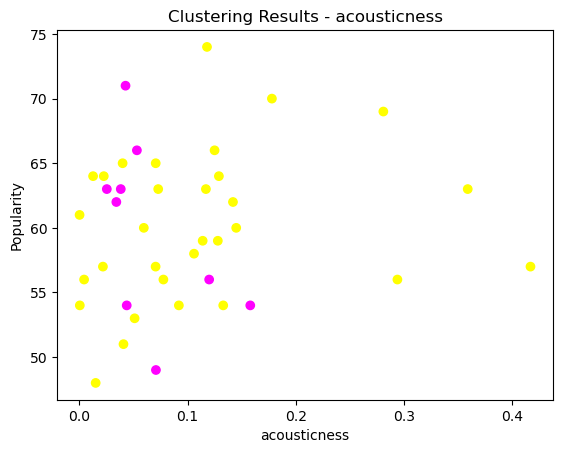

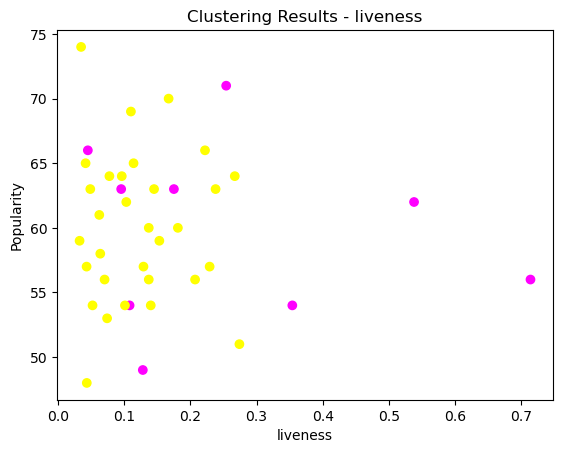

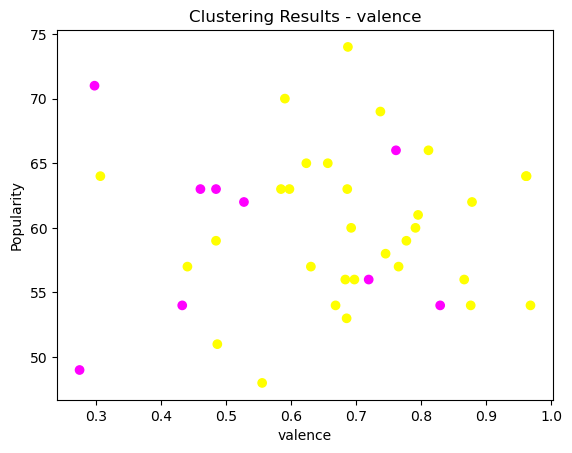

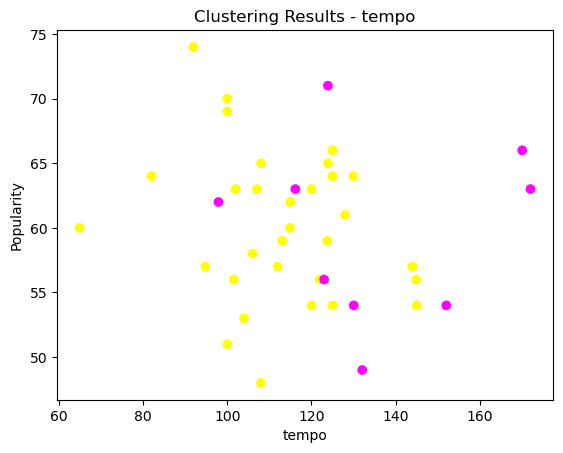

In [65]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for feature in features:
    # Scatter plot of feature vs. popularity
    plt.scatter(secondgen2[feature], secondgen2['Popularity'], c=secondgen2['Cluster'], cmap='spring')
    plt.title(f'Clustering Results - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()


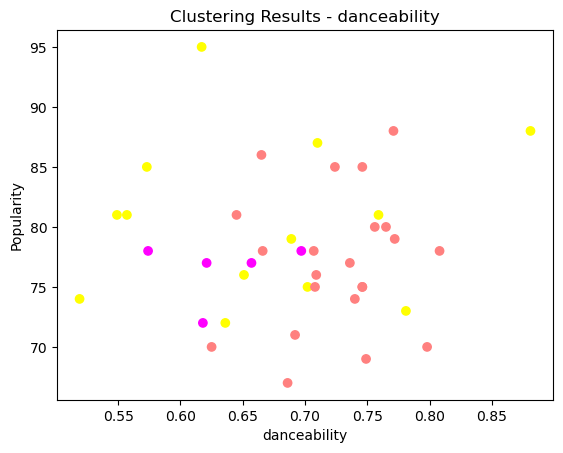

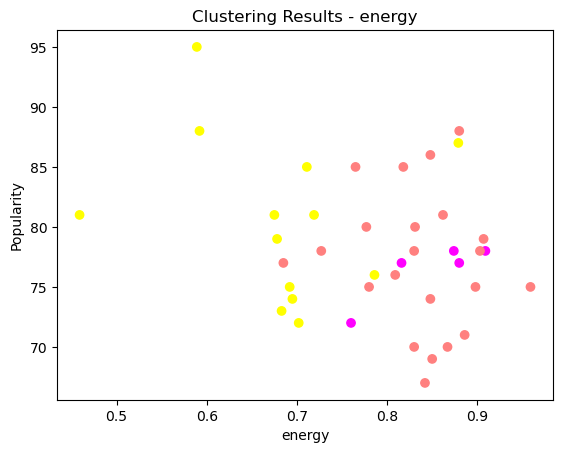

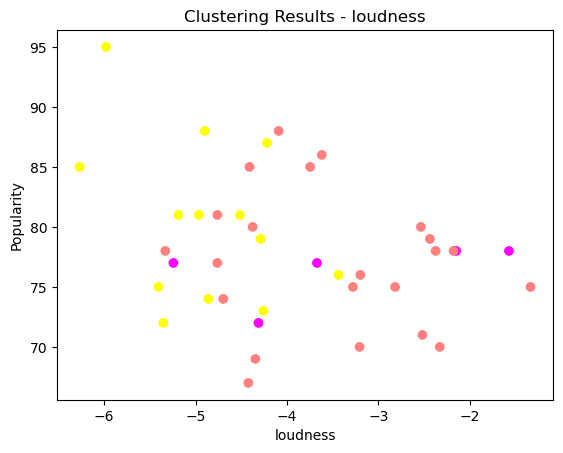

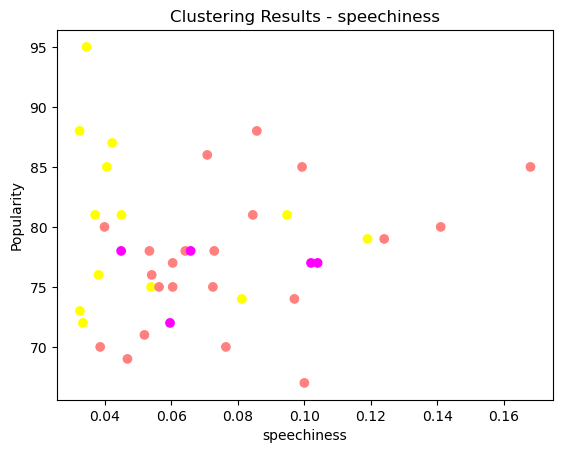

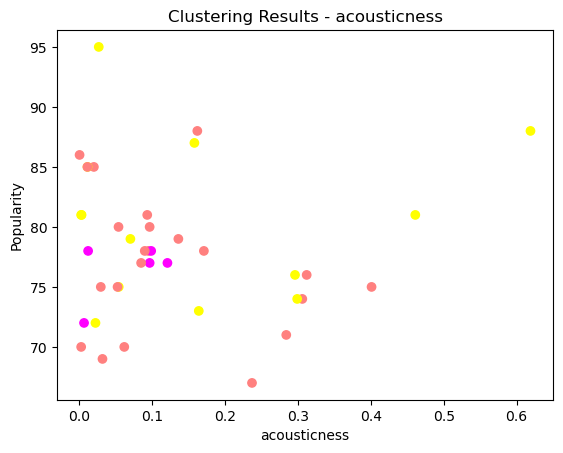

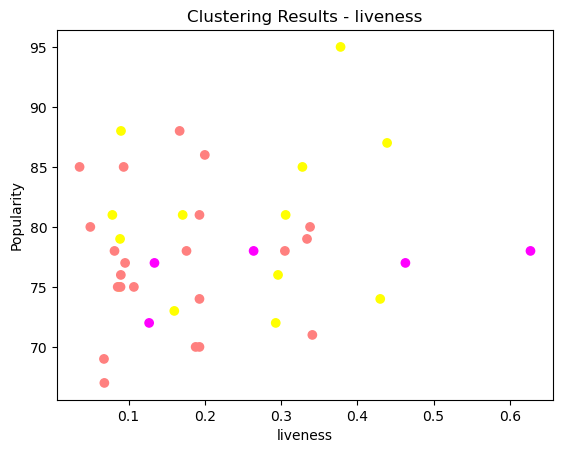

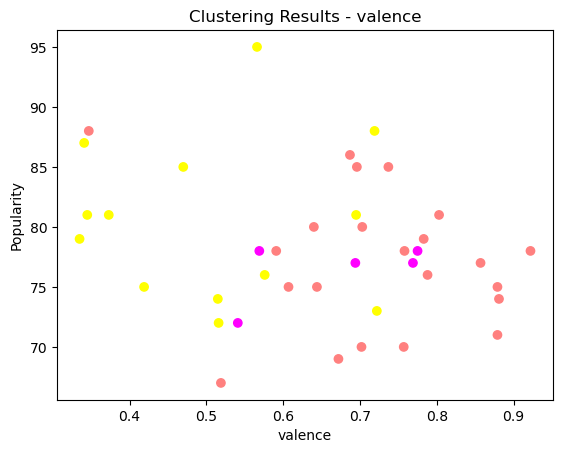

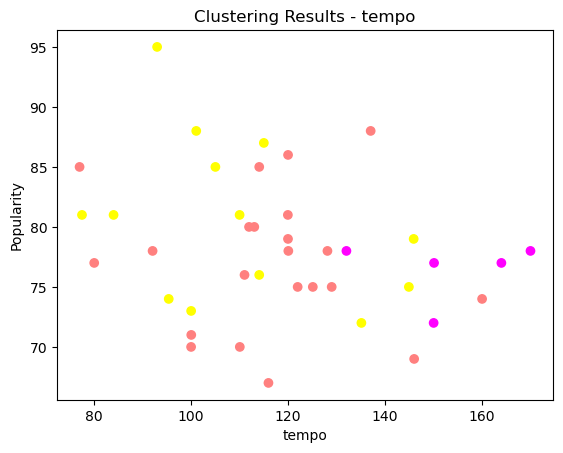

In [66]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for feature in features:
    # Scatter plot of feature vs. popularity
    plt.scatter(thirdgen2[feature], thirdgen2['Popularity'], c=thirdgen2['Cluster'], cmap='spring')
    plt.title(f'Clustering Results - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()


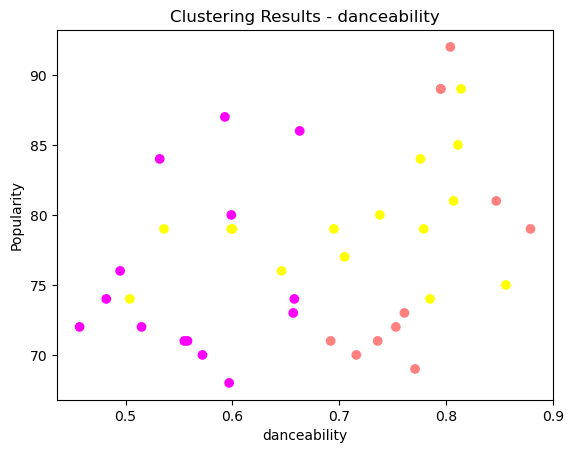

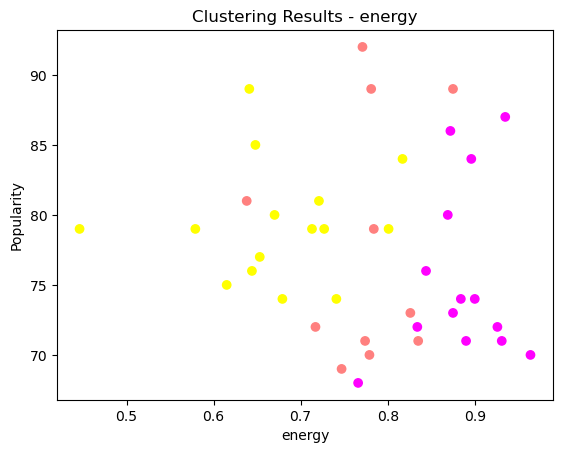

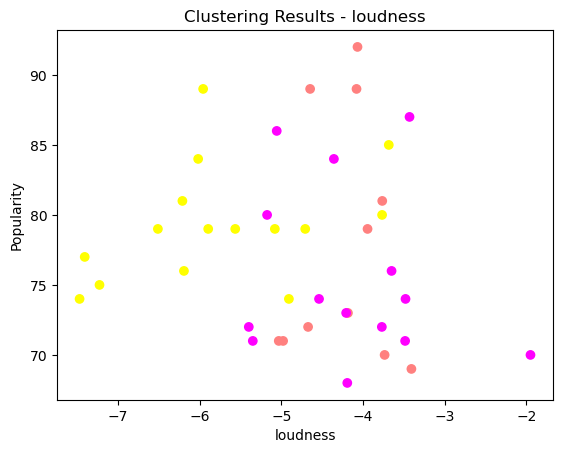

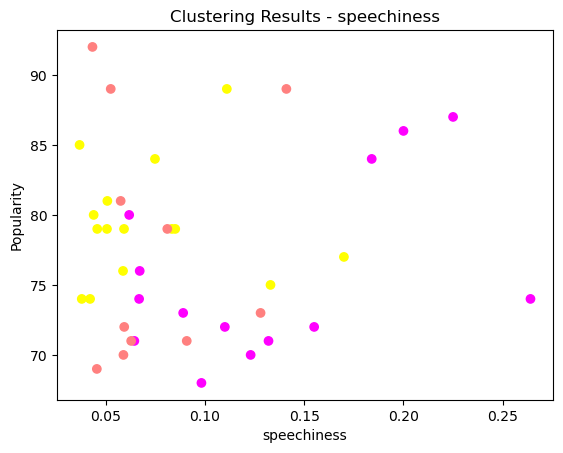

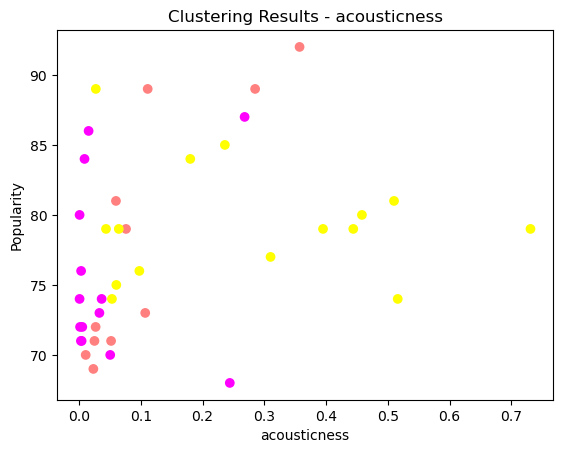

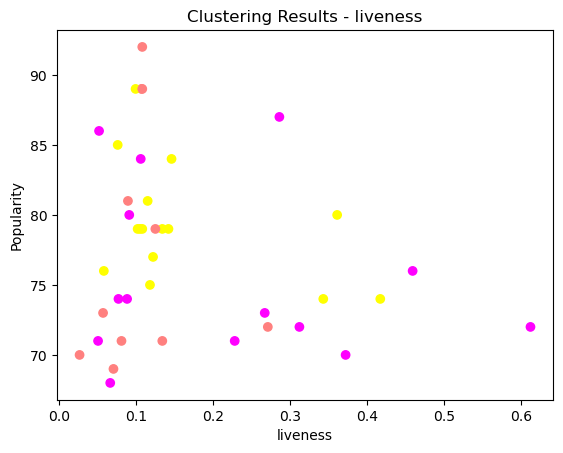

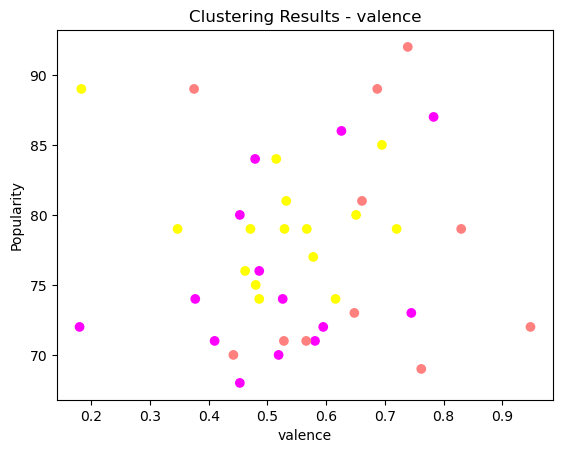

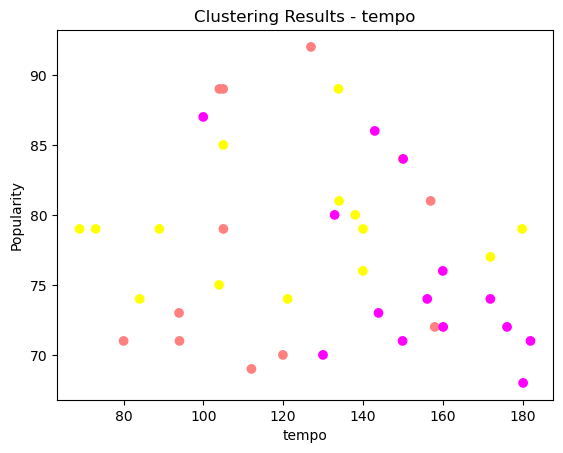

In [67]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for feature in features:
    # Scatter plot of feature vs. popularity
    plt.scatter(fourthgen2[feature], fourthgen2['Popularity'], c=fourthgen2['Cluster'], cmap='spring')
    plt.title(f'Clustering Results - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()


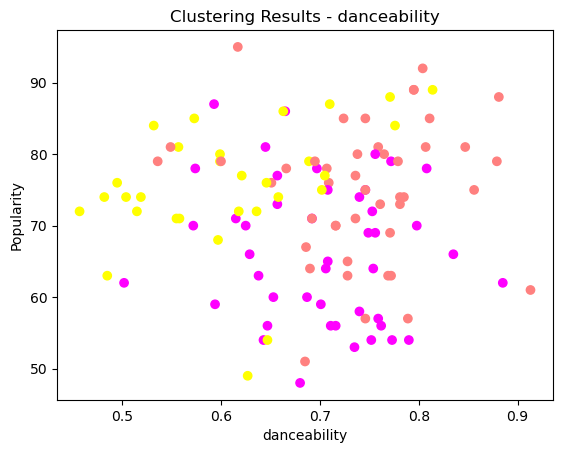

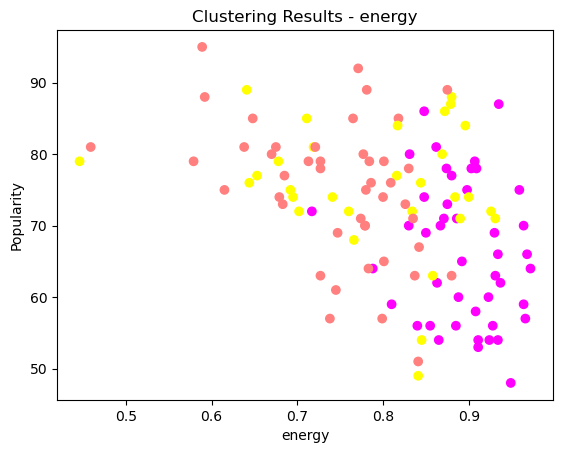

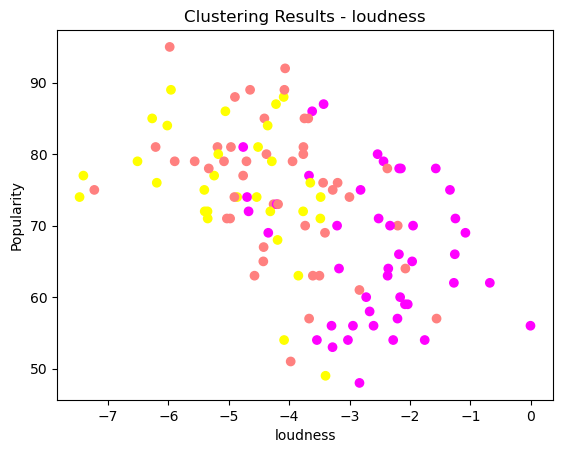

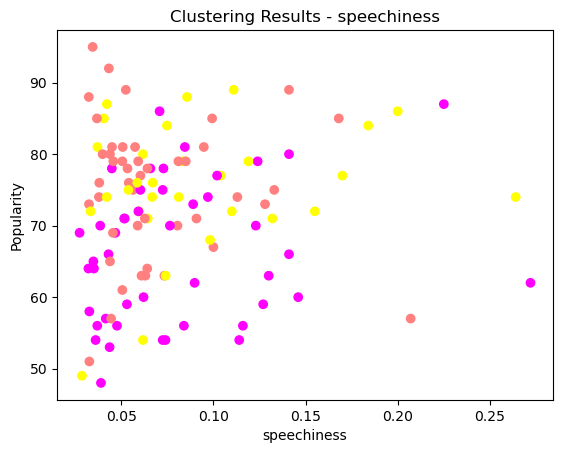

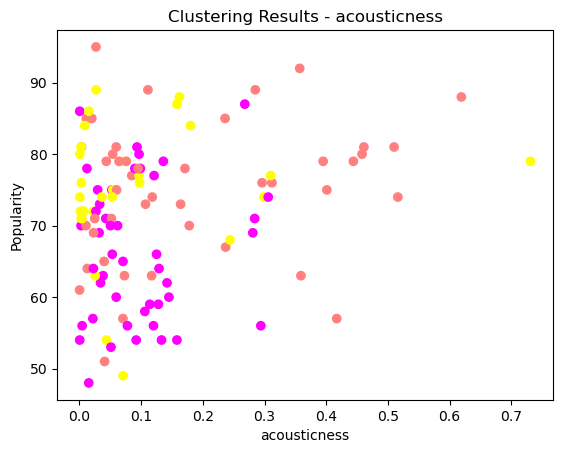

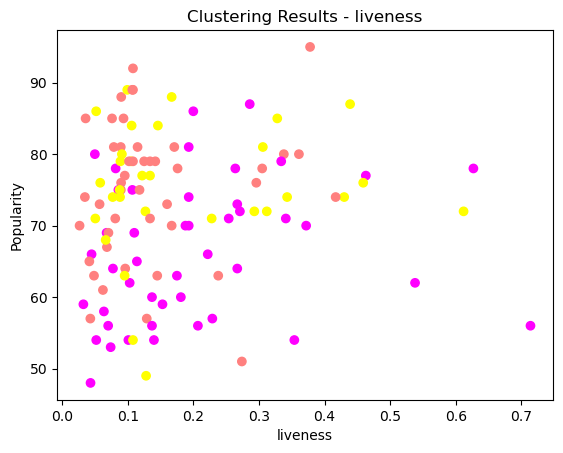

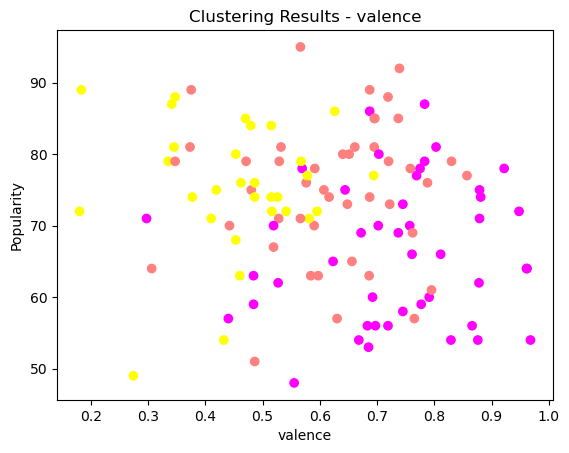

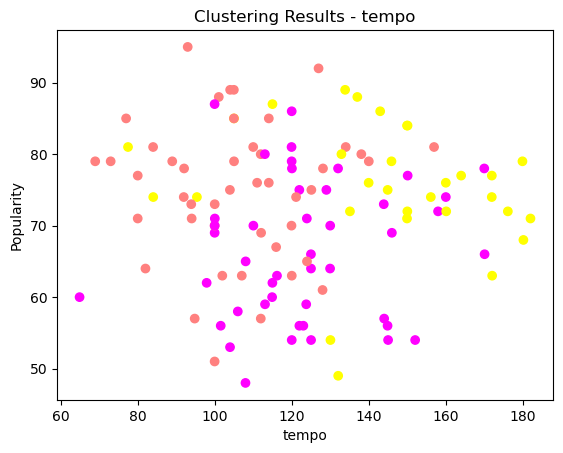

In [16]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for feature in features:
    # Scatter plot of feature vs. popularity
    plt.scatter(final_df[feature], final_df['Popularity'], c=final_df['Cluster'], cmap='spring')
    plt.title(f'Clustering Results - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()


## AUDIO FEATURE VS POPULARITY

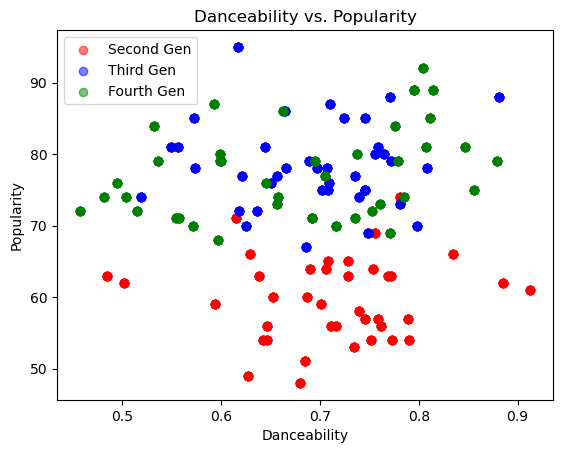

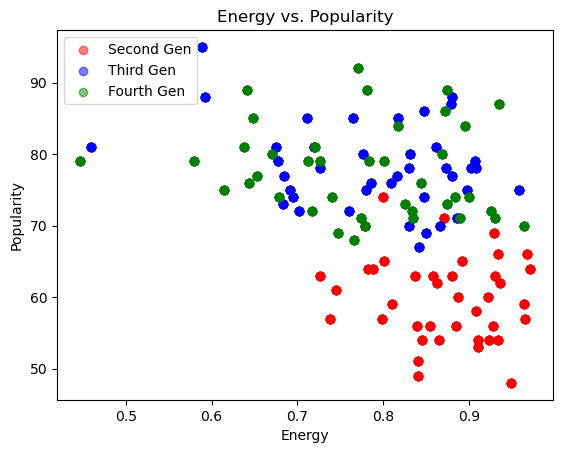

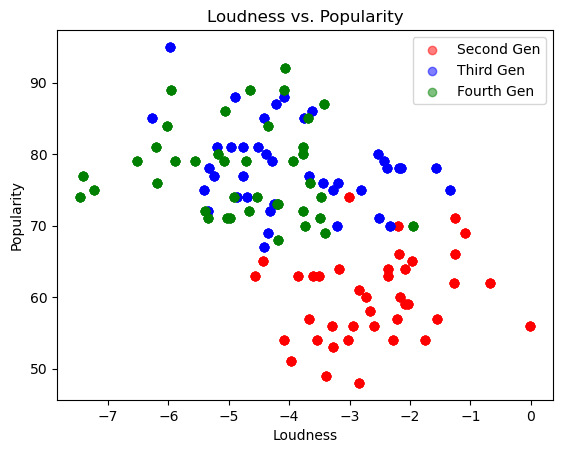

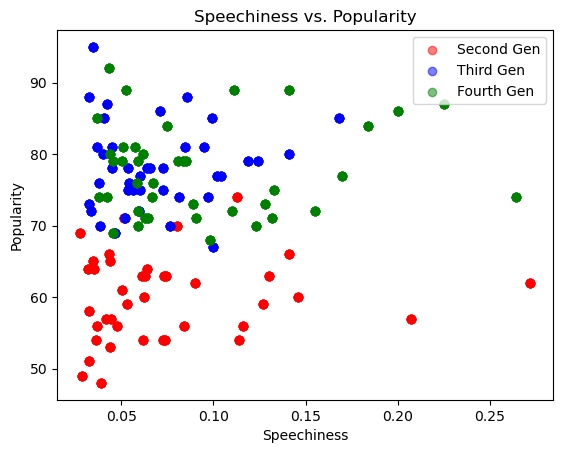

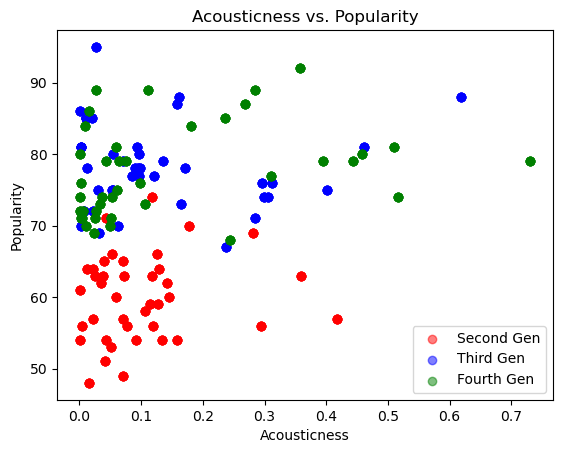

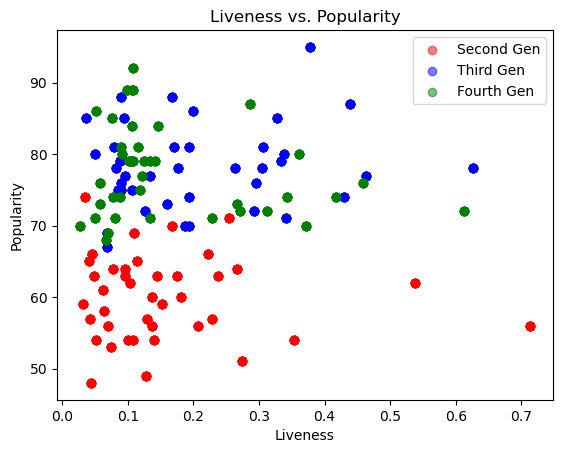

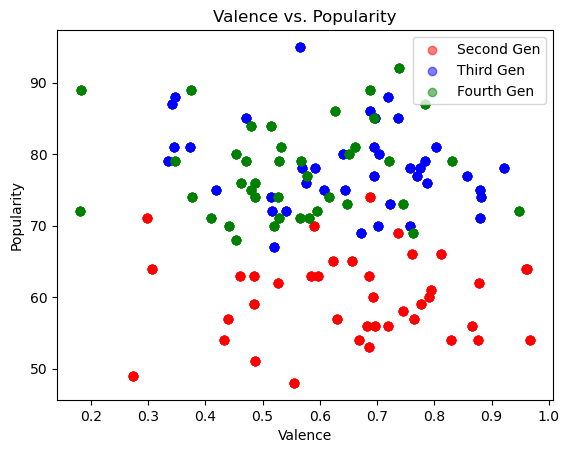

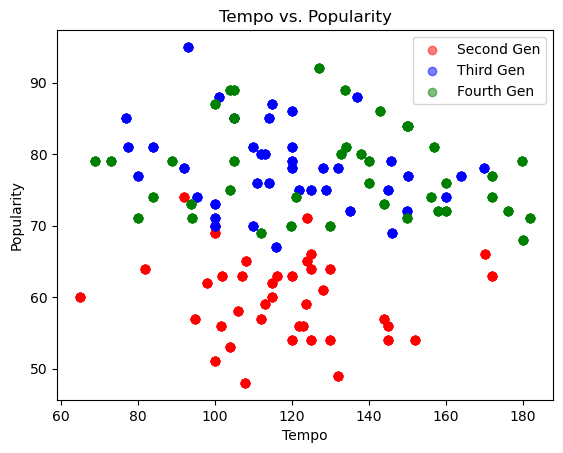

In [35]:
#SAME PLOTS AS CLUSTER FOR ALL GENERATION, EXCEPT DIVIDED BY GENERATION
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for feature in features:
    # Scatter plot of feature vs. popularity for each generation
    
    # Second Generation
    plt.scatter(secondgen2[feature], secondgen2['Popularity'], color='red', alpha=0.5, label='Second Gen')
    
    # Third Generation
    plt.scatter(thirdgen2[feature], thirdgen2['Popularity'], color='blue', alpha=0.5, label='Third Gen')
    
    # Fourth Generation
    plt.scatter(fourthgen2[feature], fourthgen2['Popularity'], color='green', alpha=0.5, label='Fourth Gen')
    
    # Plot settings
    plt.title(f'{feature.capitalize()} vs. Popularity')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Popularity')
    plt.legend()
    plt.show()


## AUDIO FEATURES MEAN

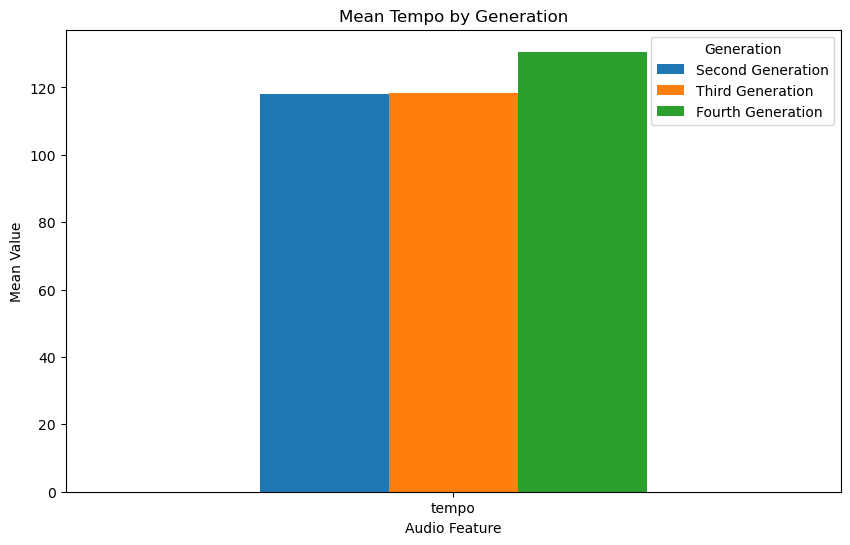

In [83]:
# Only tempo
features = ['tempo']

# Calculate the mean of audio features for each generation
mean_secondgen = secondgen2[features].mean()
mean_thirdgen = thirdgen2[features].mean()
mean_fourthgen = fourthgen2[features].mean()

# Create a DataFrame for mean values
mean_features = pd.DataFrame({'Second Generation': mean_secondgen, 'Third Generation': mean_thirdgen, 'Fourth Generation': mean_fourthgen})

# Plot the mean of audio features by generation
mean_features.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Tempo by Generation')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Generation')
plt.show()



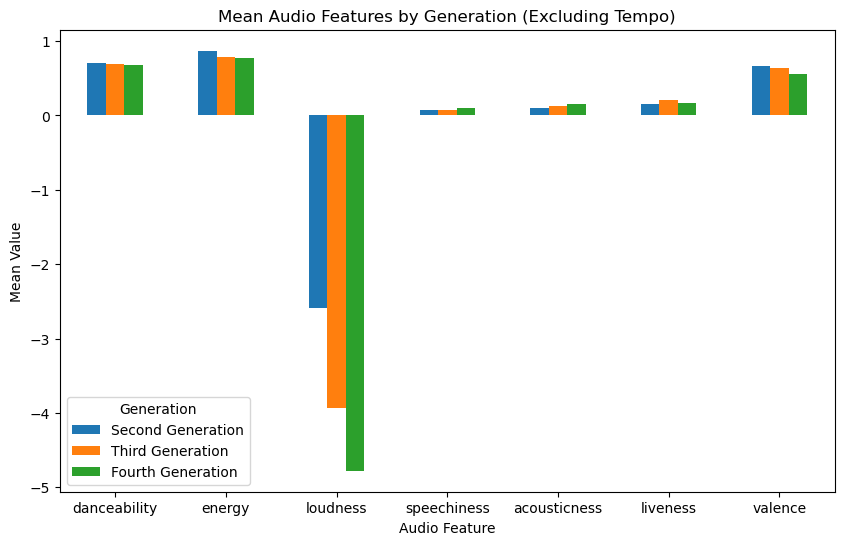

In [37]:
# Exclude 'tempo' feature 
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence']

# Calculate the mean of audio features for each generation
mean_secondgen = secondgen2[features].mean()
mean_thirdgen = thirdgen2[features].mean()
mean_fourthgen = fourthgen2[features].mean()

# Create a DataFrame for mean values
mean_features = pd.DataFrame({'Second Generation': mean_secondgen, 'Third Generation': mean_thirdgen, 'Fourth Generation': mean_fourthgen})

# Plot the mean of audio features by generation
mean_features.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Audio Features by Generation (Excluding Tempo)')
plt.xlabel('Audio Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Generation')
plt.show()


## TRACK STATISTICS

In [38]:
# Calculate statistics for track duration and tempo
avg_track_duration = secondgen2['duration_ms'].mean() / 1000  
avg_tempo = secondgen2['tempo'].mean()

print('Average Track Duration:', avg_track_duration, 'seconds')
print('Average Tempo:', avg_tempo, 'BPM')

Average Track Duration: 218.132175 seconds
Average Tempo: 117.96945 BPM


In [39]:
# Calculate statistics for track duration and tempo
avg_track_duration = thirdgen2['duration_ms'].mean() / 1000  
avg_tempo = thirdgen2['tempo'].mean()

print('Average Track Duration:', avg_track_duration, 'seconds')
print('Average Tempo:', avg_tempo, 'BPM')

Average Track Duration: 198.83722500000002 seconds
Average Tempo: 118.47765 BPM


In [40]:
# Calculate statistics for track duration and tempo
avg_track_duration = fourthgen2['duration_ms'].mean() / 1000  
avg_tempo = fourthgen2['tempo'].mean()

print('Average Track Duration:', avg_track_duration, 'seconds')
print('Average Tempo:', avg_tempo, 'BPM')

Average Track Duration: 186.647125 seconds
Average Tempo: 130.60985 BPM


## RELEASE PATTERNS ACCROSS GENERATIONS

RELEASE PATTERNS FOR TOP TRACKS

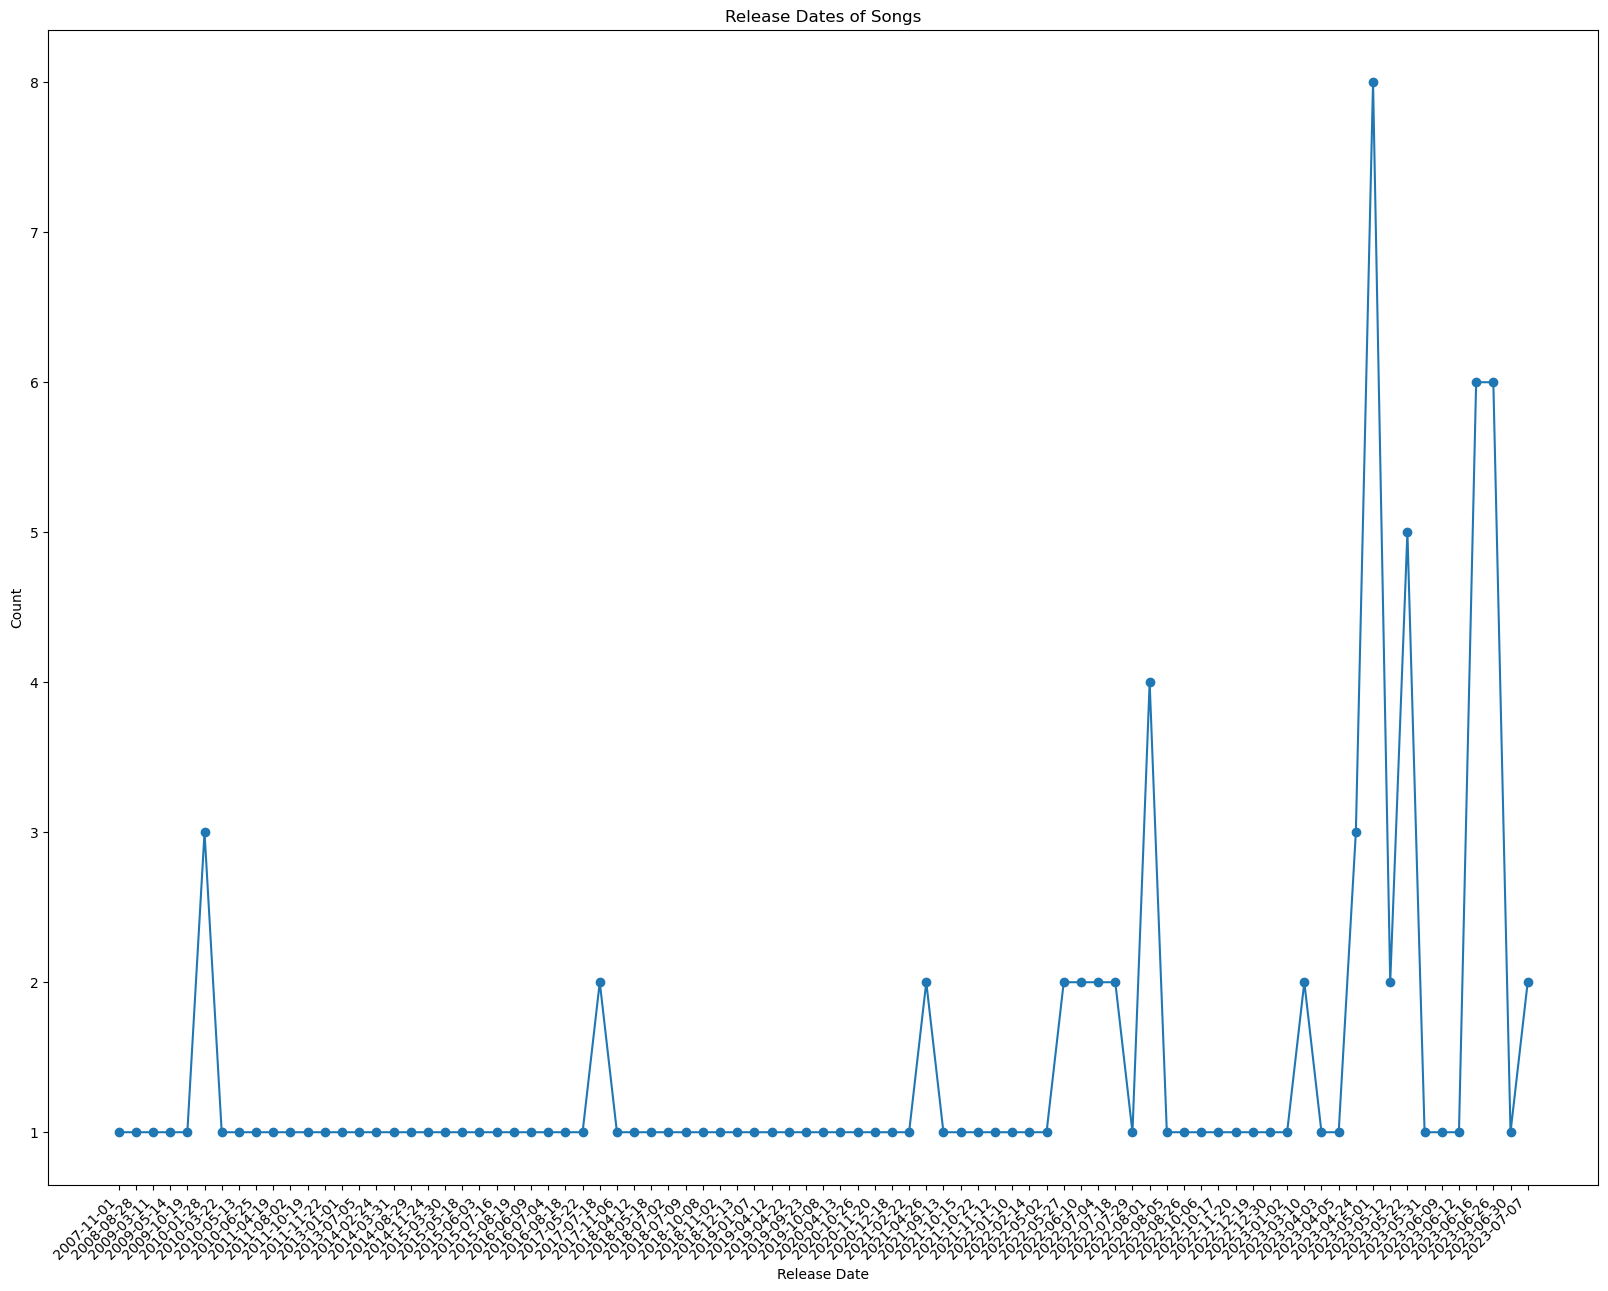

In [17]:
plt.figure(figsize=(20, 15))
release_counts = final_df['Release Date'].value_counts().sort_index()
release_counts.plot(kind='line', marker='o')
plt.title('Release Dates of Songs')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(range(len(release_counts.index)), release_counts.index, rotation=45, ha='right')
plt.show()



In [18]:
specific_dates = ['2010-01-28', '2021-04-26', '2023-05-01']

for date in specific_dates:
    albums = final_df[final_df['Release Date'] == date]['Song Name'].unique()
    print('Songs released on', date, ':')
    for album in albums:
        print('-', album)
    print()


Songs released on 2010-01-28 :
- Gee
- Genie
- Oh!

Songs released on 2021-04-26 :
- Drunk-Dazed
- FEVER

Songs released on 2023-05-01 :
- UNFORGIVEN (feat. Nile Rodgers)
- ANTIFRAGILE
- Eve, Psyche & The Bluebeard’s wife
- FEARLESS (2023 Ver.)
- Blue Flame (2023 Ver.)
- Impurities
- No-Return (Into the unknown)
- Fire in the belly



Trends: 

It seems like there are a lot of spring/summer releases. When a K-POP group releases a song, they put a lot of focus on the concept. The concepts can range from dark, vampire, pool party to summer. It seems as though these artists focus on concepts that fit the 'summer' concept. 

Since I only have the top tracks of each artists, the number of songs released on a specific date does not show 
the actual number of songs released on that date since not all songs from the album or ep are necessarily top
tracks.

RELEASE PATTERNS FOR ALBUMS

I will now try to find patterns in the release dates of albums

In [49]:
artist_albums = pd.DataFrame(columns=['Artist', 'Album', 'Release Date'])

# Loop through each artist in the final_df
for artist in final_df['Artist'].unique():
    # Search for artist
    results = sp.search(q='artist:' + artist, type='artist', limit=1)
    if results['artists']['items']:
        artist_uri = results['artists']['items'][0]['uri']
        
        # Get the albums of the artist
        albums = sp.artist_albums(artist_uri, album_type='album', limit=50)
        
        # Extract album information
        album_data = []
        for album in albums['items']:
            album_name = album['name']
            release_date = album['release_date']
            
            # Append the album information
            album_data.append({'Artist': artist, 'Album': album_name, 'Release Date': release_date})
        
        # Concatenate the album data to the DataFrame
        artist_albums = pd.concat([artist_albums, pd.DataFrame(album_data)])

# Print
artist_albums

,Artist,Album,Release Date
0,Girls Generation,FOREVER 1 - The 7th Album,2022-08-05
1,Girls Generation,Holiday Night - The 6th Album,2017-08-04
2,Girls Generation,Lion Heart - The 5th Album,2015-08-19
3,Girls Generation,2011 Girls' Generation Tour,2013-11-04
4,Girls Generation,I GOT A BOY - The 4th Album,2013-01-01
...,...,...,...
3,ATEEZ,Into the A to Z,2021-03-24
4,ATEEZ,ZERO : FEVER Part.2,2021-03-01
5,ATEEZ,ZERO : FEVER Part.1,2020-07-29
6,ATEEZ,TREASURE EP. EXTRA: Shift The Map,2019-12-04


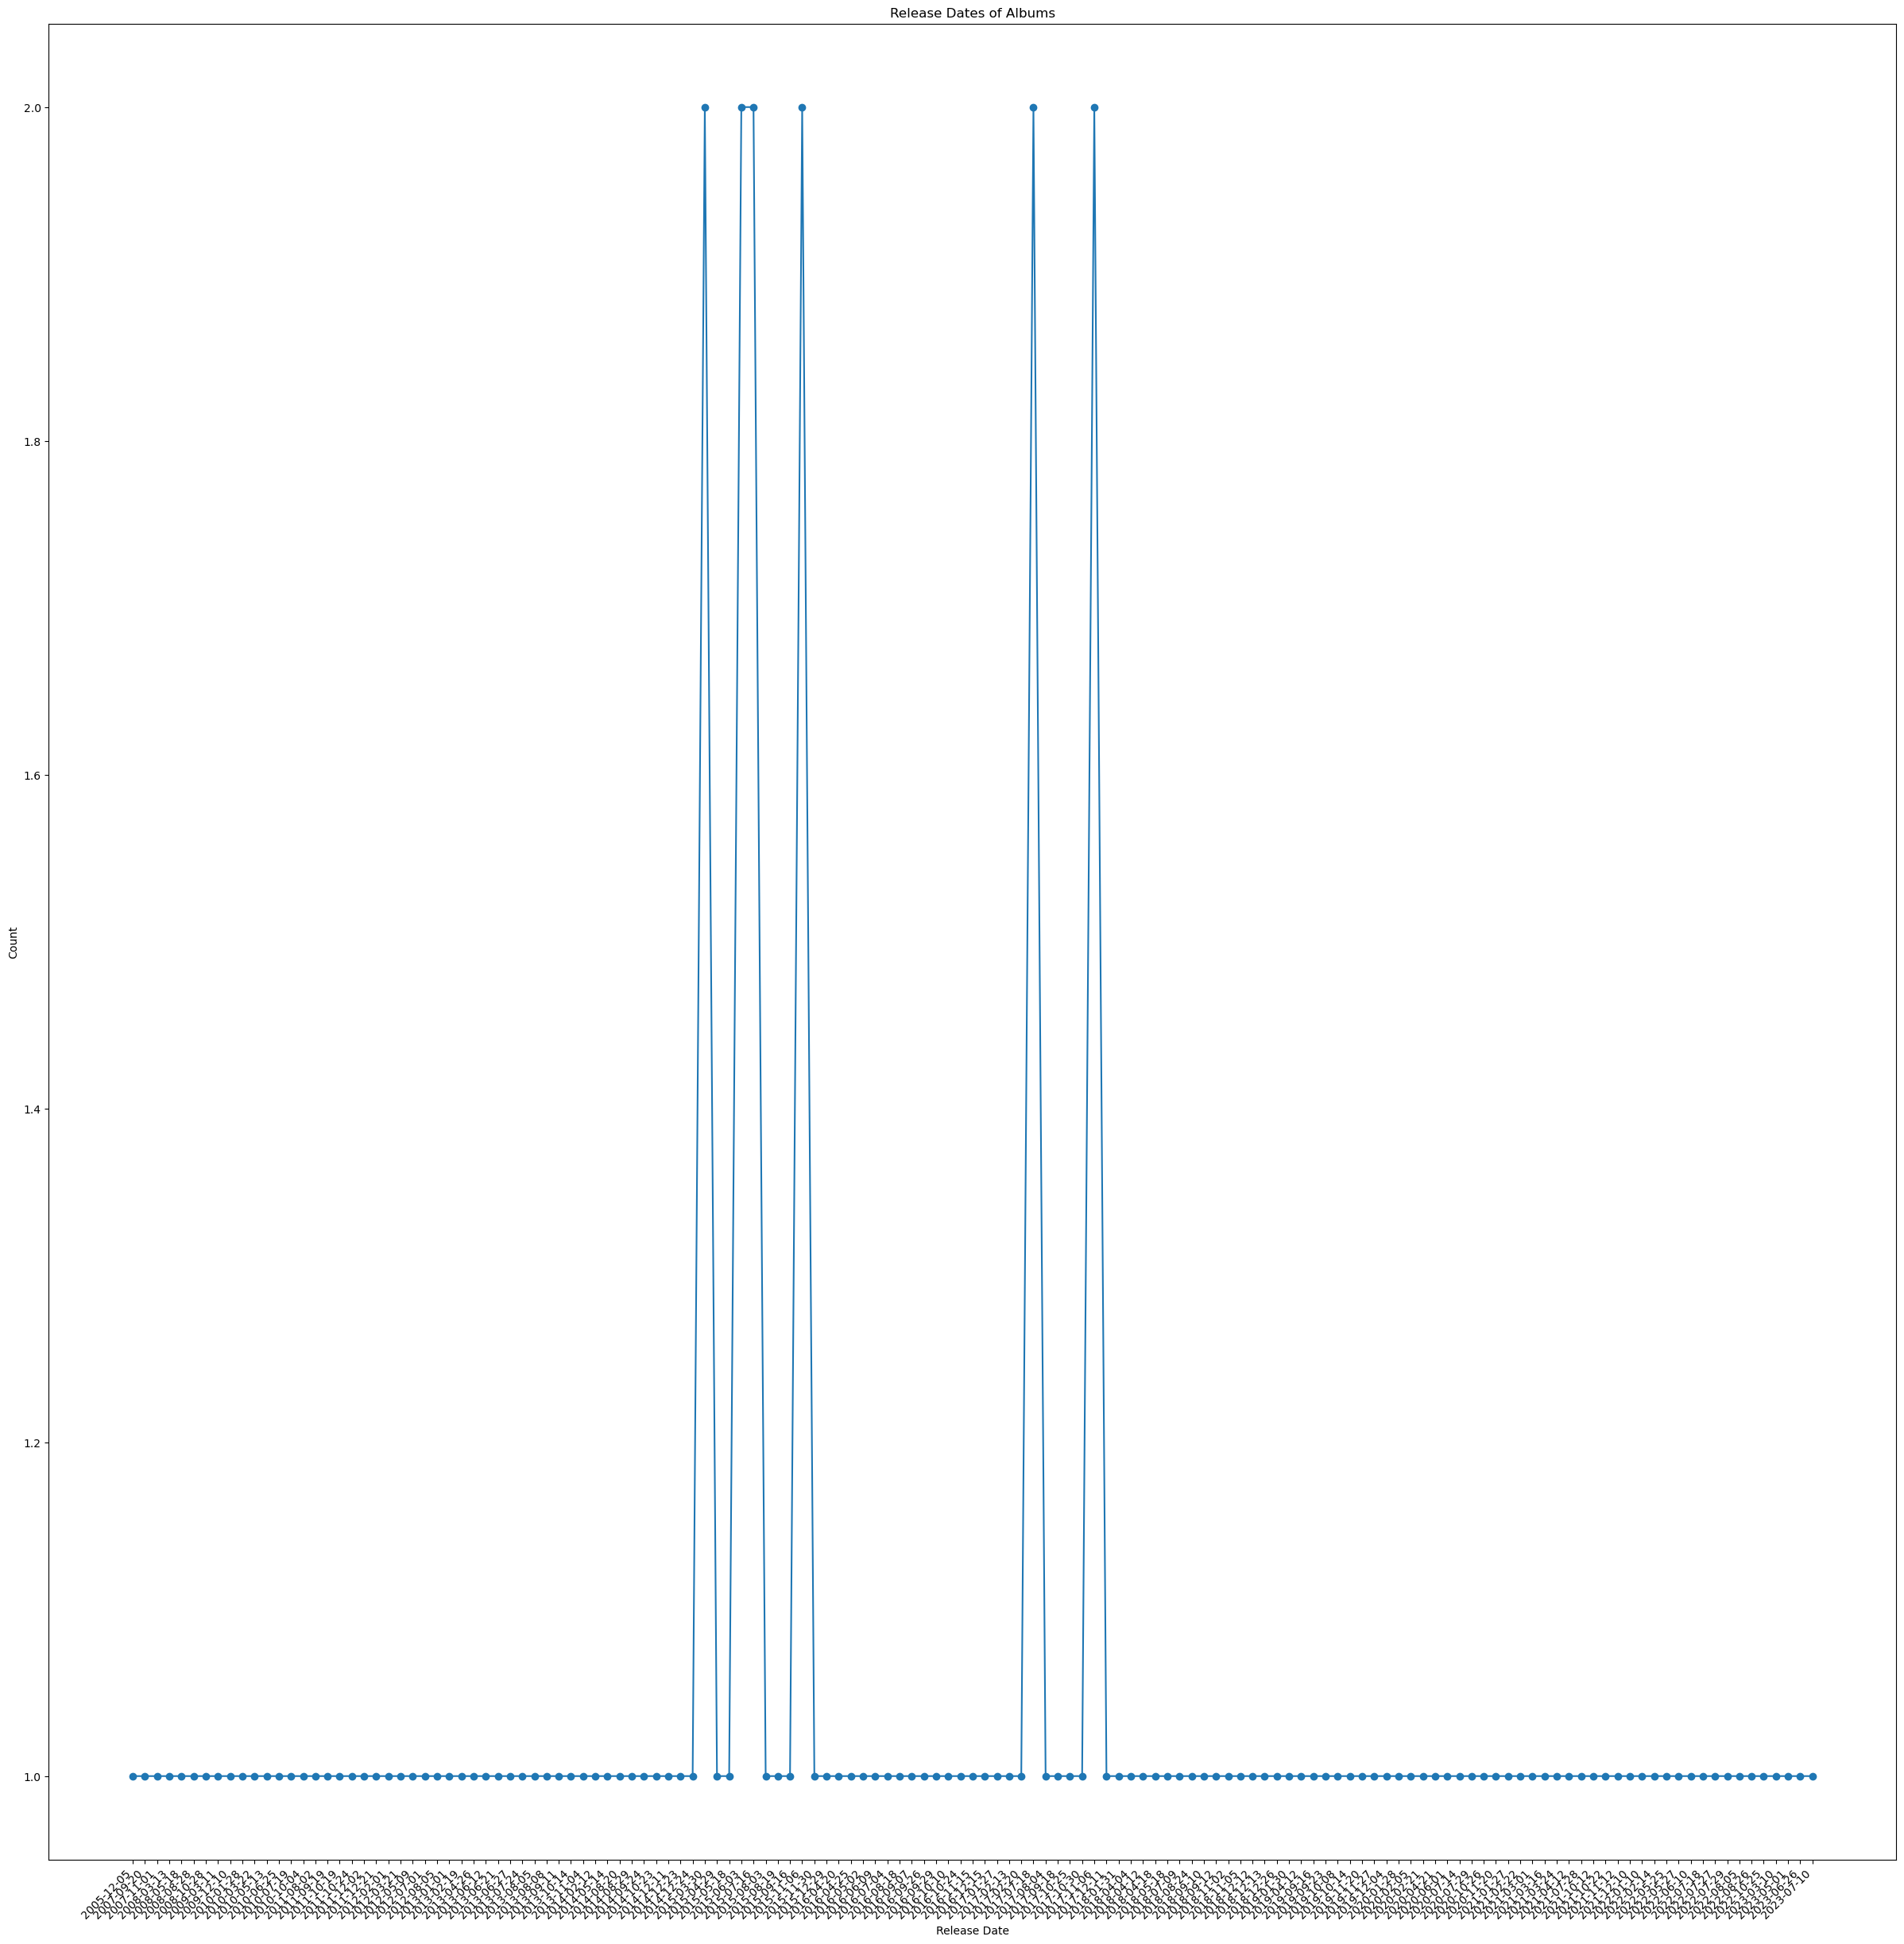

In [20]:
plt.figure(figsize=(30, 30))
release_counts = artist_albums['Release Date'].value_counts().sort_index()
release_counts.plot(kind='line', marker='o')
plt.title('Release Dates of Albums')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(range(len(release_counts.index)), release_counts.index, rotation=45, ha='right')
plt.show()

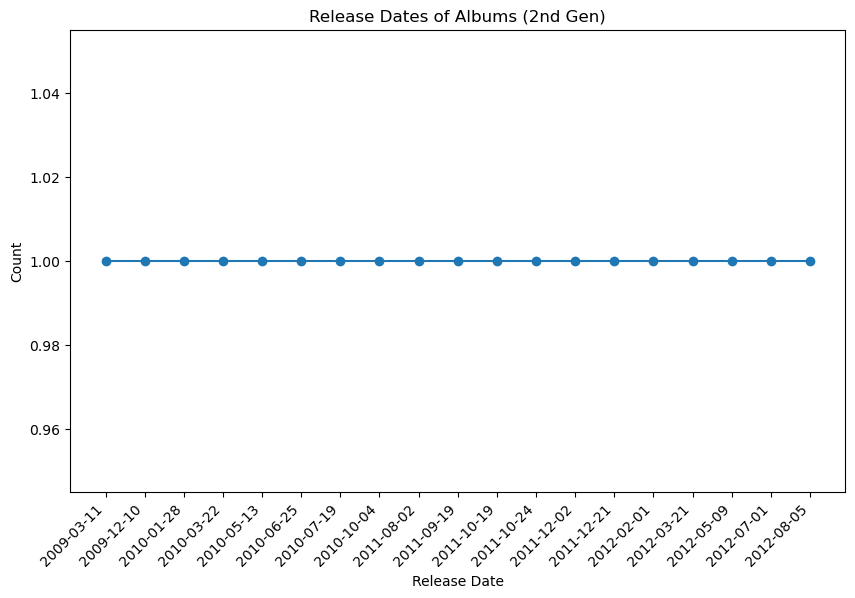

In [76]:
#Since it is difficult to see the dates with the previous plot, I will be plotting the 3 generations seperately. 
#Second Gen dates
start_date = '2009-01-01'
end_date = '2012-12-31'

plt.figure(figsize=(10, 6))
release_counts = artist_albums['Release Date'].value_counts().sort_index()

# Filter the release_counts df based on the date range
filtered_counts = release_counts.loc[start_date:end_date]

filtered_counts.plot(kind='line', marker='o')
plt.title('Release Dates of Albums (2nd Gen)')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(range(len(filtered_counts.index)), filtered_counts.index, rotation=45, ha='right')
plt.show()


In [81]:
album_counts_by_month = artist_albums['Release Date'].value_counts().sort_index()

# Filter the album counts based on the date range
start_date = '2009-01-01'
end_date = '2012-12-31'
filtered_counts = album_counts_by_month.loc[start_date:end_date]

# Print the counts
filtered_counts

2009-03-11    1
2009-12-10    1
2010-01-28    1
2010-03-22    1
2010-05-13    1
2010-06-25    1
2010-07-19    1
2010-10-04    1
2011-08-02    1
2011-09-19    1
2011-10-19    1
2011-10-24    1
2011-12-02    1
2011-12-21    1
2012-02-01    1
2012-03-21    1
2012-05-09    1
2012-07-01    1
2012-08-05    1
Name: Release Date, dtype: int64

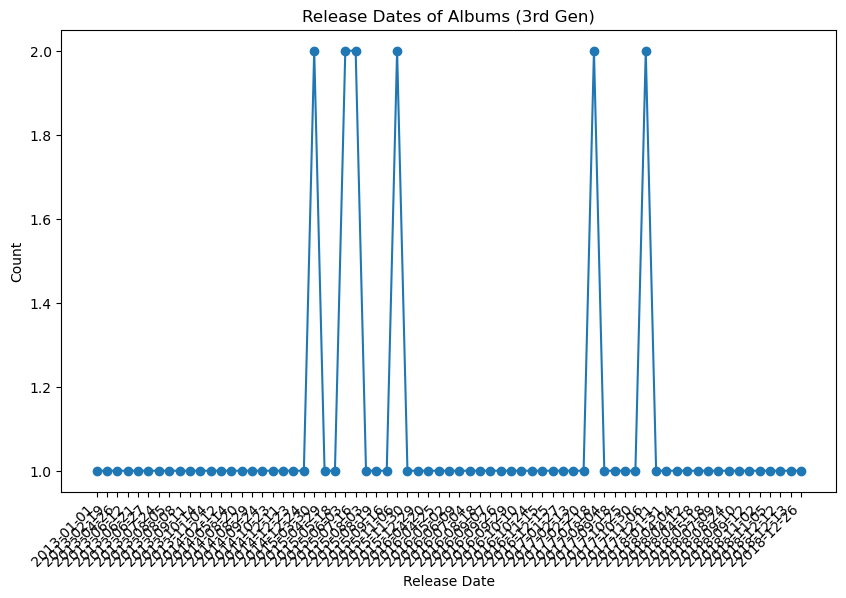

In [75]:
#Third Gen dates
start_date = '2013-01-01'
end_date = '2018-12-31'

plt.figure(figsize=(10, 6))
release_counts = artist_albums['Release Date'].value_counts().sort_index()

# Filter the release_counts df based on the date range
filtered_counts = release_counts.loc[start_date:end_date]

filtered_counts.plot(kind='line', marker='o')
plt.title('Release Dates of Albums (3rd Gen)')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(range(len(filtered_counts.index)), filtered_counts.index, rotation=45, ha='right')
plt.show()


In [80]:
album_counts_by_month = artist_albums['Release Date'].value_counts().sort_index()

# Filter the album counts based on the date range
start_date = '2013-01-01'
end_date = '2018-12-31'
filtered_counts = album_counts_by_month.loc[start_date:end_date]

# Print the counts
filtered_counts

2013-01-01    1
2013-02-19    1
2013-04-26    1
2013-06-12    1
2013-06-21    1
             ..
2018-11-02    1
2018-11-05    1
2018-12-12    1
2018-12-13    1
2018-12-26    1
Name: Release Date, Length: 69, dtype: int64

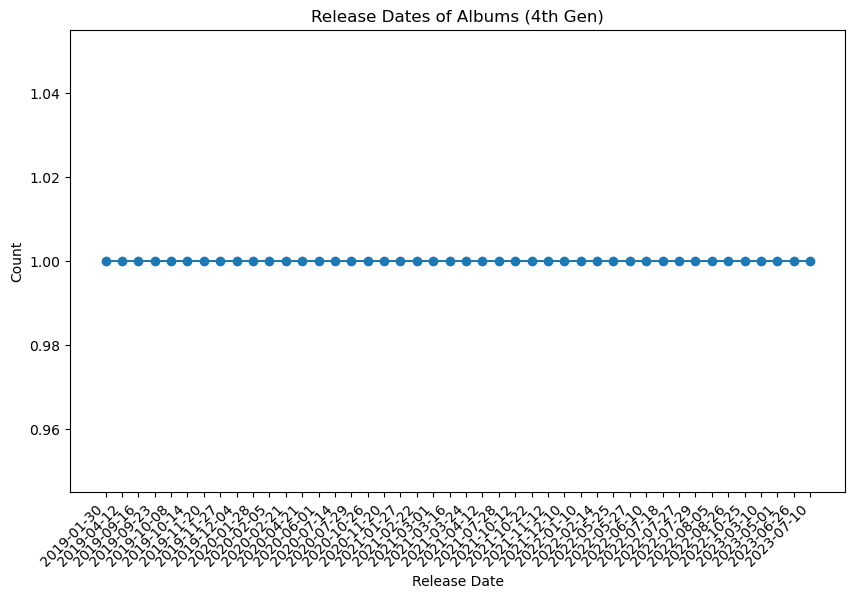

In [74]:
#Fourth Gen dates
start_date = '2019-01-01'
end_date = '2023-07-11'

plt.figure(figsize=(10, 6))
release_counts = artist_albums['Release Date'].value_counts().sort_index()

# Filter the release_counts df based on the date range
filtered_counts = release_counts.loc[start_date:end_date]

filtered_counts.plot(marker='o')
plt.title('Release Dates of Albums (4th Gen)')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(range(len(filtered_counts.index)), filtered_counts.index, rotation=45, ha='right')
plt.show()


In [82]:
album_counts_by_month = artist_albums['Release Date'].value_counts().sort_index()

# Filter the album counts based on the date range
start_date = '2019-01-01'
end_date = '2023-07-11'
filtered_counts = album_counts_by_month.loc[start_date:end_date]

# Print the counts
print(filtered_counts)

2019-01-30    1
2019-04-12    1
2019-09-16    1
2019-09-23    1
2019-10-08    1
2019-10-14    1
2019-11-20    1
2019-11-27    1
2019-12-04    1
2020-01-28    1
2020-02-05    1
2020-02-21    1
2020-04-21    1
2020-06-01    1
2020-07-14    1
2020-07-29    1
2020-10-26    1
2020-11-20    1
2021-01-27    1
2021-02-22    1
2021-03-01    1
2021-03-16    1
2021-03-24    1
2021-04-12    1
2021-07-28    1
2021-10-12    1
2021-10-22    1
2021-11-12    1
2021-12-10    1
2022-01-10    1
2022-02-14    1
2022-05-25    1
2022-05-27    1
2022-06-10    1
2022-07-18    1
2022-07-27    1
2022-07-29    1
2022-08-05    1
2022-08-26    1
2022-10-25    1
2023-03-10    1
2023-05-01    1
2023-06-26    1
2023-07-10    1
Name: Release Date, dtype: int64


For the groups I have selected, their release dates do not overlap much. The releases are well spread throughout the months. For the second generation, there is no trend in release dates. For the third generation, there seems to be more albums released in the fall months (September, October and November). For the fourth generation, they seems to release more albums in Summer and Fall.


## POPULARITY COMPARISON

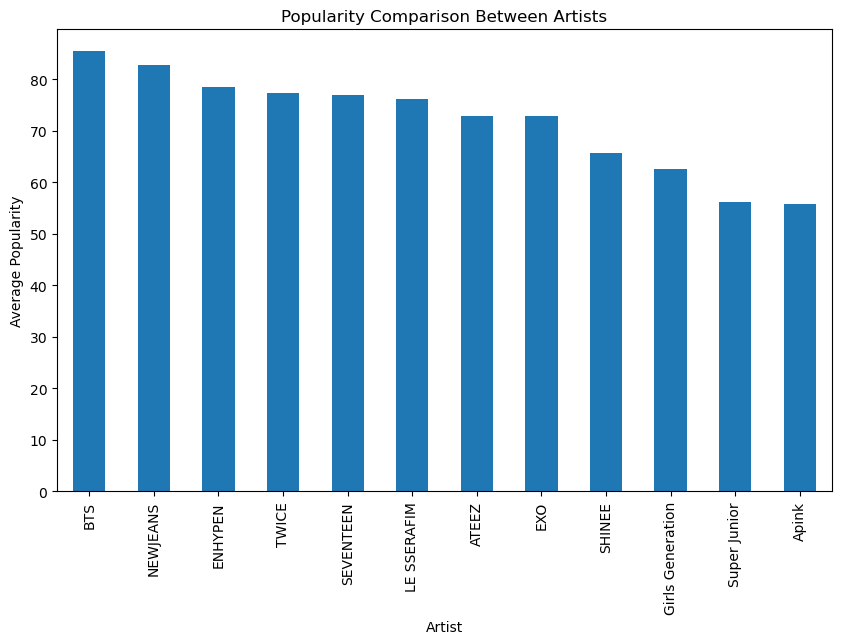

In [22]:
#Popularity by group

# Group by artist and mean popularity
popularity_comparison = final_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 6))
popularity_comparison.plot(kind='bar')
plt.title('Popularity Comparison Between Artists')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.show()

In [23]:
group_followers = {}

# List of K-pop groups
group_names = ['Girls Generation', 'SHINEE', 'Super Junior', 'Apink', 'BTS', 'SEVENTEEN', 'TWICE', 'EXO', 'NEWJEANS', 'LE SSERAFIM', 'ENHYPEN', 'ATEEZ']

# Iterate through each group name and retrieve the followers count
for group_name in group_names:
    result = sp.search(q='artist:' + group_name, type='artist', limit=1)
    if len(result['artists']['items']) > 0:
        artist = result['artists']['items'][0]
        group_followers[group_name] = artist['followers']['total']
    else:
        group_followers[group_name] = 0

# Sort based on followers count in ascending order
sorted_group_followers = {k: v for k, v in sorted(group_followers.items(), key=lambda item: item[1])}

# Print the followers count
for group, followers in sorted_group_followers.items():
    print(f"{group}: {followers} followers")

Apink: 1215067 followers
Super Junior: 2393380 followers
Girls Generation: 2439591 followers
LE SSERAFIM: 2532600 followers
ATEEZ: 2989215 followers
SHINEE: 3025530 followers
NEWJEANS: 3901642 followers
ENHYPEN: 5938955 followers
SEVENTEEN: 9631025 followers
EXO: 9662392 followers
TWICE: 18147898 followers
BTS: 67021681 followers


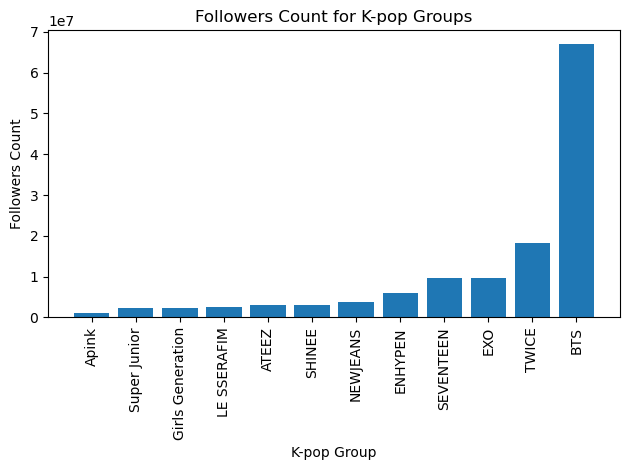

In [24]:
groups = list(sorted_group_followers.keys())
followers_count = list(sorted_group_followers.values())

plt.bar(groups, followers_count)
plt.xticks(rotation=90)
plt.xlabel('K-pop Group')
plt.ylabel('Followers Count')
plt.title('Followers Count for K-pop Groups')
plt.tight_layout()

Popularity is solely based on the fans personal preference, it does not necessarily relate to a group's audio features. K-POP groups are more than just their music, they promote their members and their teamwork as well, for example. K-POP fans do not just choose to follow groups based on their music, there are many factors, one of them being the members of a group and their personalities. 

## PREDICTED POPULARITY VS ACTUAL POPULARITY

Mean Squared Error: 36.362142947479356


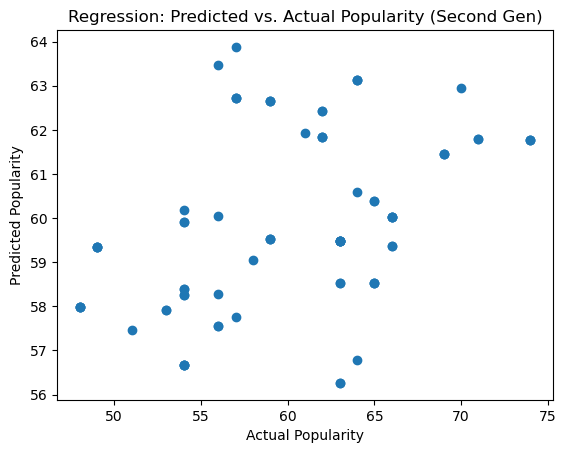

In [25]:
# Select features and target variable
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
target = 'Popularity'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(secondgen2[features], secondgen2[target], test_size=0.2, random_state=42)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Regression: Predicted vs. Actual Popularity (Second Gen)')
plt.show()


Mean Squared Error: 24.375105614547422


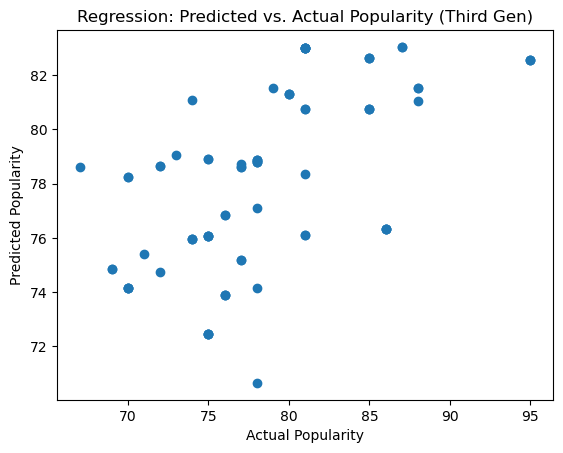

In [26]:
# Select features and target variable
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
target = 'Popularity'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(thirdgen2[features], thirdgen2[target], test_size=0.2, random_state=42)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Regression: Predicted vs. Actual Popularity (Third Gen)')
plt.show()


Mean Squared Error: 32.29895298407602


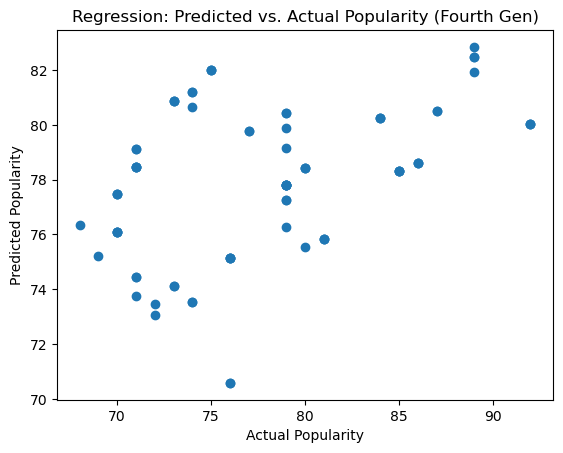

In [27]:
# Select features and target variable
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
target = 'Popularity'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(fourthgen2[features], fourthgen2[target], test_size=0.2, random_state=42)

# Train the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Regression: Predicted vs. Actual Popularity (Fourth Gen)')
plt.show()


Overall, based on the MSE values, the third generation of K-pop seems to have the best fit with the selected features, indicating that these features are more relevant for predicting the popularity of songs in the third generation compared to the second and fourth generations. This shows that there are other factors that affect the popularity of a song.

## EXTRA - PLAYLIST FOLLOWERS

In [28]:
#Wanted to know the popularity of playlists by generation
def getPlaylistFollowerCount(user, playlist_id):
    playlist = sp.user_playlist(user, playlist_id)
    return playlist['followers']['total']

In [29]:
getPlaylistFollowerCount('azizazhariramli', '2olOnYOj1paGcLOTbkPTdZ')

2768

In [30]:
getPlaylistFollowerCount('husnaannisa', '6x9G992JNwDVO5DqoOOreA')

2642

In [31]:
getPlaylistFollowerCount('delvianaftsr', '1GSdwx9OMXReZLW8V5G40t')

1

I was curious to see if the popularity of groups would be reflected in a few playlits's follower counts. From the 3 playlists I chose, the follower count are not reflective of the popularity of the groups. However, this is a matter of personal taste and also how users use Spotify, it is not necessarily true that all users follow playlists. 

## EXTRA - RECOMMENDATIONS

In [34]:
def get_recommendations(track_name):
    # Get track URI
    results = sp.search(q=track_name, type='track')
    track_uri = results['tracks']['items'][0]['uri']

    # Get recommended tracks
    recommendations = sp.recommendations(seed_tracks=[track_uri])['tracks']
    return recommendations

get_recommendations('UNFORGIVEN')

[{'album': {'album_type': 'SINGLE',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5R7AMwDeroq6Ls0COQYpS4'},
     'href': 'https://api.spotify.com/v1/artists/5R7AMwDeroq6Ls0COQYpS4',
     'id': '5R7AMwDeroq6Ls0COQYpS4',
     'name': 'Kep1er',
     'type': 'artist',
     'uri': 'spotify:artist:5R7AMwDeroq6Ls0COQYpS4'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',
    'GH',
    'GM',
    'GN',
    'GQ',
    'GR

You can get song recommendations based on a song just by writing the song name. 